In [ ]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!cd yolov5 & pip install -r requirements.txt

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-9-25 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
img = '/content/pexels-mikechie-esparagoza-1600757.jpg'

In [ ]:
results = model(img)
results.print()

image 1/1: 2534x3648 1 person, 23 cars, 2 buss, 1 truck
Speed: 181.9ms pre-process, 44.0ms inference, 1.9ms NMS per image at shape (1, 3, 448, 640)


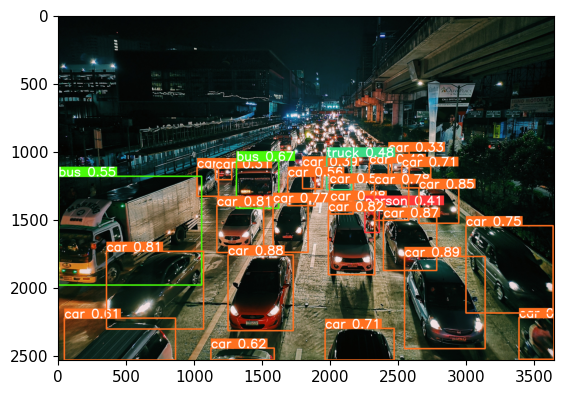

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
results.render()

[array([[[  4,   8,   9],
         [  4,   8,   9],
         [  4,   8,   9],
         ...,
         [  4,  13,  10],
         [  3,  12,   9],
         [  3,  12,   9]],
 
        [[  4,   8,   9],
         [  4,   8,   9],
         [  4,   8,   9],
         ...,
         [  3,  12,   9],
         [  3,  12,   9],
         [  2,  11,   8]],
 
        [[  5,   9,  10],
         [  5,   9,  10],
         [  5,   9,  10],
         ...,
         [  5,  11,   9],
         [  4,  10,   8],
         [  4,  10,   8]],
 
        ...,
 
        [[ 41,  50,  21],
         [ 39,  48,  19],
         [ 42,  48,  20],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[ 47,  56,  25],
         [ 45,  54,  23],
         [ 47,  54,  23],
         ...,
         [255, 112,  31],
         [255, 112,  31],
         [255, 112,  31]],
 
        [[ 51,  60,  29],
         [ 50,  59,  28],
         [ 53,  58,  28],
         ...,
         [255, 112,  31],
  

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    # Make detections
    results = model(frame)

    cv2.imshow('YOLO', np.squeeze(results.render()))

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [ ]:
import uuid   # Unique identifier
import os
import time

In [ ]:
IMAGES_PATH = os.path.join('data', 'images') #/data/images
labels = ['awake', 'drowsy']
number_imgs = 5

In [ ]:
import cv2
import os
import uuid
import time

# Your labels
labels = ['awake']
number_imgs = 1  # Number of images to capture for each label

IMAGES_PATH = 'path_to_save_images'  # Replace with your desired path

cap = cv2.VideoCapture(0)

for label in labels:
    print(f'Collecting images for {label}')
    time.sleep(5)
    for img_num in range(number_imgs):
        print(f'Collecting images for {label}, image number {img_num}')

        # Webcam feed
        ret, frame = cap.read()

        # Adding a delay of 1 second before capturing the frame
        time.sleep(1)

        # Check if the frame is not empty
        if ret and frame is not None:
            # Naming out image path
            imgname = os.path.join(IMAGES_PATH, label + '.' + str(uuid.uuid1()) + '.jpg')

            # Writes out image to file
            cv2.imwrite(imgname, frame)

            # Render to the screen
            cv2.imshow('Image Collection', frame)

            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

cap.release()
cv2.destroyAllWindows()


In [ ]:
print(os.path.join(IMAGES_PATH, labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

path_to_save_images/awake.1fef0b6c-5b97-11ee-86c3-0242ac1c000c.jpg


In [ ]:
for label in labels:
    print('Collecting images for {}'.format(label))
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(imgname)

path_to_save_images/awake.29b019de-5b97-11ee-86c3-0242ac1c000c.jpg


In [ ]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...
remote: Enumerating objects: 2097, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 2097 (delta 0), reused 4 (delta 0), pack-reused 2090
Receiving objects: 100% (2097/2097), 237.14 MiB | 44.45 MiB/s, done.
Resolving deltas: 100% (1242/1242), done.


In [ ]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 337.9/337.9 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 12.7 MB/s eta 0:00:00


In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
Traceback (most recent call last):
  File "/content/yolov5/train.py", line 647, in <module>
    main(opt)
  File "/content/yolov5/train.py", line 511, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "/content/yolov5/utils/general.py", line 468, in check_file
    asser

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [20]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')

In [ ]:
results = model(img)

In [ ]:
results.print()

In [ ]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()